<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ingeniería features

Crear un modelo base en la estimación de la espacie de iris<br>
v1.1

<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/iris_dataset.png" width="1000" align="center"></a>

In [21]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from  sklearn import  datasets

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [24]:
iris=datasets.load_iris()
df_data = pd.DataFrame(data= iris.data, columns= iris.feature_names)
df_target = pd.DataFrame(data= iris.target, columns= ['species'])
print(df_data.head())
print(df_target.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   species
0        0
1        0
2        0
3        0
4        0


In [27]:
# Generar una copia de df_target llamada "df_target_categorical" en el cual se almacenará los tipos de iris como variables categóricas (texto)
df_target_categorical = df_target.copy()

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [30]:
# Alumno: Utilizar apply y lambda expresion sobre df_target para modificar la columna "species" de df_target_categorical
# la lambda debe devolver:
# setosa --> si species = 0
# versicolor --> si species = 1
# virginica --> si species = 2

# Tip:
# df_target_categorical['species'] = df_target.apply(lambda...... 
df_target_categorical['species'] = df_target.apply(lambda x: 'setosa' if x.species == 0 else 'versicolor' if x.species == 1 else 'virginica', axis=1)



In [33]:
# Alumno: Observar las primeras filas del nuevo df_target_categorical para corroborar que haya sido correcto el cambio
df_target_categorical.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [36]:
# Alumno: Contar cuantas especies de iris hay de cada una en el dataset df_target_categorical
df_target_categorical['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [39]:
# Concatenar ambos dataset
df = pd.concat([df_data, df_target_categorical], axis= 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
# Alumno: Analice si hay elementos incompletos en el dataset "df_data" o "df_target"
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
Nan,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000


In [45]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
# print(....)
print('Datos disponibles para analizar: ', df.shape[0])

Datos disponibles para analizar:  150


# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

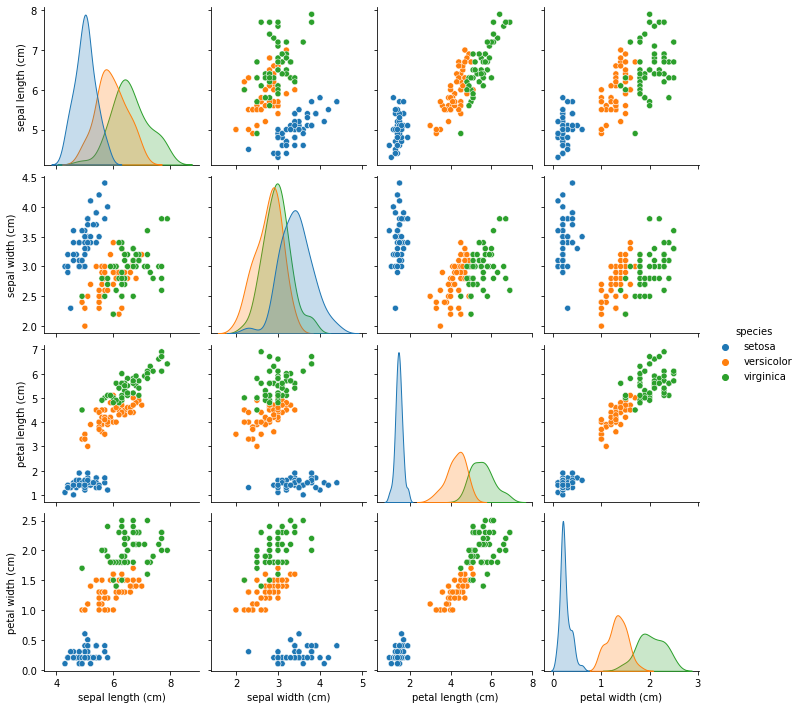

In [48]:
# Observar todas las relaciones entre todos los features
sns.pairplot(df, hue= 'species')

In [49]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
# Alumno, crea una columna "target" que representará una clasificación binario donde:
# target = 1 (si la especie es setosa)
# target = 0 (si la especio no es setosa)
df['target'] = df['species'].apply(lambda x: 1 if x == 'setosa' else 0)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,target
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


# Entrenar modelo
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle"></div>

In [51]:
# Almuno: Crear un numpy array "X" de los siguientes features de entrada:
# sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values

In [52]:
# Almuno: Crear un numpy array "y" con los valores de la columna target
y = df['target'].values

In [53]:
# Alumno: Cree los dataset de entrenamiento (train) y evaluación (test)
# utilizando la herramienta train_test_split de scikit-learn, utilice la proporción
# 70%30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Almuno: Crear un modelo base el cual mediante la función random estime un "1" o "0" para el dataset "X_test"
# Los resultados deben almacenarse en una variable llamada y_hat_base
# Creamos el modelo base
class IrisBaseModel():
    def fit(self,X,y):
        return None
    
    def predict(self,X):
        return np.random.randint(0, 2, size=X.shape[0])

random_model = IrisBaseModel()
random_model.fit(X_train, y_train)

# almacenamiento en y_hat_base
y_hat_base = random_model.predict(X_test)

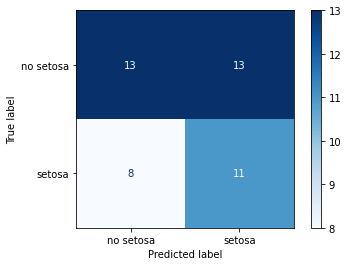

In [55]:
# Alumno: Dibujar la matriz de confusión con y_test e y_hat_base. Colocar los "labels" (titulos) correspondientes
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat_base)
cmd = ConfusionMatrixDisplay(cm, display_labels=['no setosa', 'setosa'])
cmd.plot(cmap=plt.cm.Blues)
plt.show()

In [56]:
# Alumno: Calcular la exactitud (accuracy) de los resultados del modelo base
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat_base, normalize=True)

0.5333333333333333

In [57]:
# Alumno: Calcular el f1_score de los resultados del modelo base
from sklearn.metrics import f1_score
f1_score(y_test, y_hat_base)

0.5116279069767442